In [4]:
import networkx as nx
import matplotlib.pyplot as plt
# from gklearn.kernels.commonWalkKernel import commonwalkkernel 
import numpy as np


def read_graph(filename):
    G = nx.Graph()
    with open(filename, "r") as f:
        for line in f:
            if line.startswith("a"):
                _, u, v, w = line.strip().split()
                G.add_edge(int(u), int(v), weight=int(w))
    return G


def plot_degree_distribution(G: nx.Graph, name=""):
    """
    Degree of a node in a network is the number of connections it has to other nodes
    Degree distribution is the probability distribution of these degrees over the whole network.
    """
    degrees = [G.degree(n) for n in G.nodes()]

    plt.hist(
        degrees,
        bins=range(min(degrees), max(degrees) + 2),
        align="left",
        edgecolor="black",
    )
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title(f"Degree Distribution - {name}")
    plt.show()


def plot_weight_distribution(G: nx.Graph, name=""):
    weights = [d["weight"] for _, _, d in G.edges(data=True)]

    plt.hist(weights, bins="auto", edgecolor="black")
    plt.xlabel("Edge Weight")
    plt.ylabel("Frequency")
    plt.xscale("log")
    plt.title(f"Edge Weight Distribution - {name}")
    plt.grid(True)
    plt.show()


def info(G: nx.Graph, name: str = ""):
    V = G.number_of_nodes()
    E = G.number_of_edges()
    max_E = V * (V - 1) // 2
    density = E / max_E if max_E > 0 else 0
    components = nx.number_connected_components(G)

    print(f"Graph: {name}")
    print(f"  Nodes (V): {V}")
    print(f"  Edges (E): {E}")
    print(f"  Max Edges (Complete Graph): {max_E}")
    print(f"  Density: {density:.8f}")
    print(f"  Connected Components: {components}\n")

    return {
        "Graph": name,
        "Nodes": V,
        "Edges": E,
        "Max Edges": max_E,
        "Density": density,
        "Connected Components": components,
    }


In [5]:
DISTANCE_GRAPH_FILES = {
    "Great Lakes": "USA-road-d.LKS.gr",
    "California and Nevada": "USA-road-d.CAL.gr",
    "Northeast USA": "USA-road-d.NE.gr",
    "Northwest USA": "USA-road-d.NW.gr",
    "Florida": "USA-road-d.FLA.gr",
    "Colorado": "USA-road-d.COL.gr",
    "San Francisco Bay Area": "USA-road-d.BAY.gr",
    "New York City": "USA-road-d.NY.gr",
}
TIME_GRAPH_FILES = {
    "Great Lakes": "USA-road-t.LKS.gr",
    "California and Nevada": "USA-road-t.CAL.gr",
    "Northeast USA": "USA-road-t.NE.gr",
    "Northwest USA": "USA-road-t.NW.gr",
    "Florida": "USA-road-t.FLA.gr",
    "Colorado": "USA-road-t.COL.gr",
    "San Francisco Bay Area": "USA-road-t.BAY.gr",
    "New York City": "USA-road-t.NY.gr",
}

DISTANCE GRAPHS
Graph: Great Lakes
  Nodes (V): 2758119
  Edges (E): 3397404
  Max Edges (Complete Graph): 3803608830021
  Density: 0.00000089
  Connected Components: 1



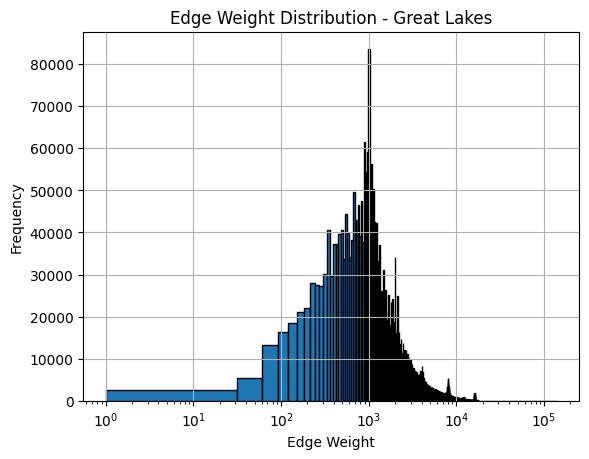

Graph: California and Nevada
  Nodes (V): 1890815
  Edges (E): 2315222
  Max Edges (Complete Graph): 1787589736705
  Density: 0.00000130
  Connected Components: 1



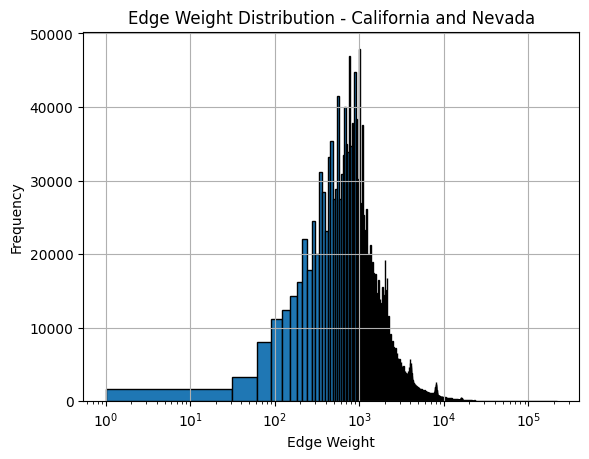

KeyboardInterrupt: 

In [6]:
def analyze_all_graphs(graph_files):
    density = []
    for name, filename in graph_files.items():
        G = read_graph(filename)

        res = info(G, name=name)
        density.append(res["Density"])

        plot_weight_distribution(G, name)

    print(f"MEAN DENSITY: {np.mean(np.array(density))}.")


# mean density: 0.0000039716

print("DISTANCE GRAPHS")
analyze_all_graphs(DISTANCE_GRAPH_FILES)

print("TIME GRAPHS")
analyze_all_graphs(TIME_GRAPH_FILES)